In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance

%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/KNNAlgorithmDataset.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
f1 = df['radius_mean']
f2 = df['texture_mean']

alpha = 0.3

In [5]:
colors = []
labels = []
for i in range(len(df)):
    if df['diagnosis'][i] == 'M':
        labels.append(1)
        colors.append('blue')
    else:
        labels.append(0)
        colors.append('orange')

In [6]:
data = np.c_[f1, f2, labels]

In [7]:
data

array([[17.99, 10.38,  1.  ],
       [20.57, 17.77,  1.  ],
       [19.69, 21.25,  1.  ],
       ...,
       [16.6 , 28.08,  1.  ],
       [20.6 , 29.33,  1.  ],
       [ 7.76, 24.54,  0.  ]])

<IPython.core.display.Javascript object>


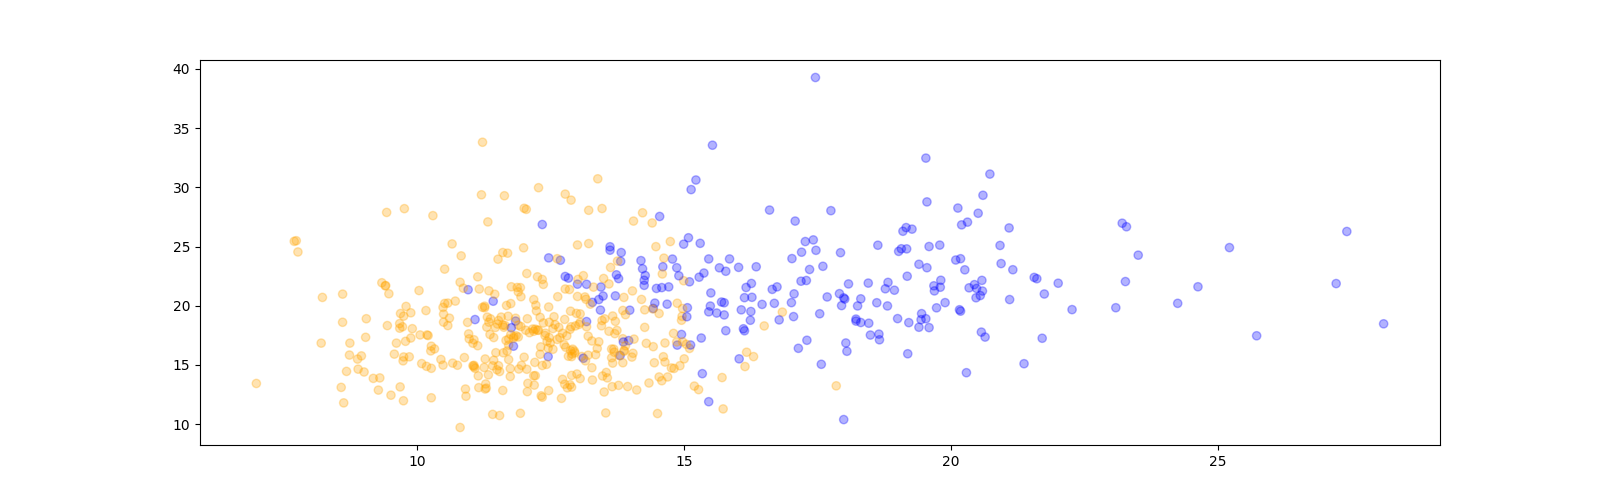

In [8]:
fig, ax = plt.subplots(figsize=(16,5))
ax.scatter(f1, f2, c=colors, alpha=alpha)

In [10]:
# creating the grid
h = 0.4
xx, yy = np.meshgrid(
    np.arange(min(f1)-1, max(f1)+1, h),
    np.arange(min(f2)-1, max(f2)+1, h)
)

In [11]:
def getEuclidean(point, X):
    distances = []
    for i in range(len(X)):
        d = [distance.euclidean(point, X[i, [0,1]]), X[i, 2]]
        distances.append(d)
    return distances

In [18]:
k = getEuclidean(point, data)
arrMin = tuple()

for _ in range(15):
    minimum = min(k)
    arrMin = arrMin + (minimum,)
    k.remove(minimum)

In [23]:
arrMin

([0.5968249324550716, 1.0],
 [1.2705904139414887, 1.0],
 [1.6977926846349627, 0.0],
 [1.7348486965726992, 0.0],
 [1.7395401691251609, 0.0],
 [1.834121042897658, 0.0],
 [1.851323850653904, 0.0],
 [1.9616319736382775, 1.0],
 [2.0153659717282117, 0.0],
 [2.3965391713886084, 0.0],
 [2.418139780905977, 0.0],
 [2.436554944999192, 1.0],
 [2.5196229876709744, 0.0],
 [2.9115803269015257, 0.0],
 [2.916504757410829, 0.0])

In [73]:
def KNearestNeighbors(X,k=3,mesh=gridpoints):
    preds = []
    for point in mesh:
        dist = getEuclidean(point, X)
        minDistances = ()
        for _ in range(k):
            minimum = min(dist)
            minDistances = minDistances + (minimum,)
            dist.remove(minimum)
        ones = np.count_nonzero(np.array(minDistances)[:, 1])
        zeros = len(minDistances) - ones
        
        if ones > zeros:
            preds.append(1)
        else:
            preds.append(0)
    return np.array(preds)

In [38]:
zz = KNearestNeighbors(data)

In [93]:
hx = 0.2
hy = 1
xx_, yy_ = np.meshgrid(
    np.arange(min(f1)-1, max(f1)+1, hx),
    np.arange(min(f2)-1, max(f2)+1, hy)
)

testgrid=np.c_[xx_.ravel(), yy_.ravel()]

In [94]:
zz_ = KNearestNeighbors(data, mesh=testgrid)

In [95]:
test_cols = []
for i in zz_:
    if i == 1:
        test_cols.append('blue')
    else:
        test_cols.append('orange')

<IPython.core.display.Javascript object>


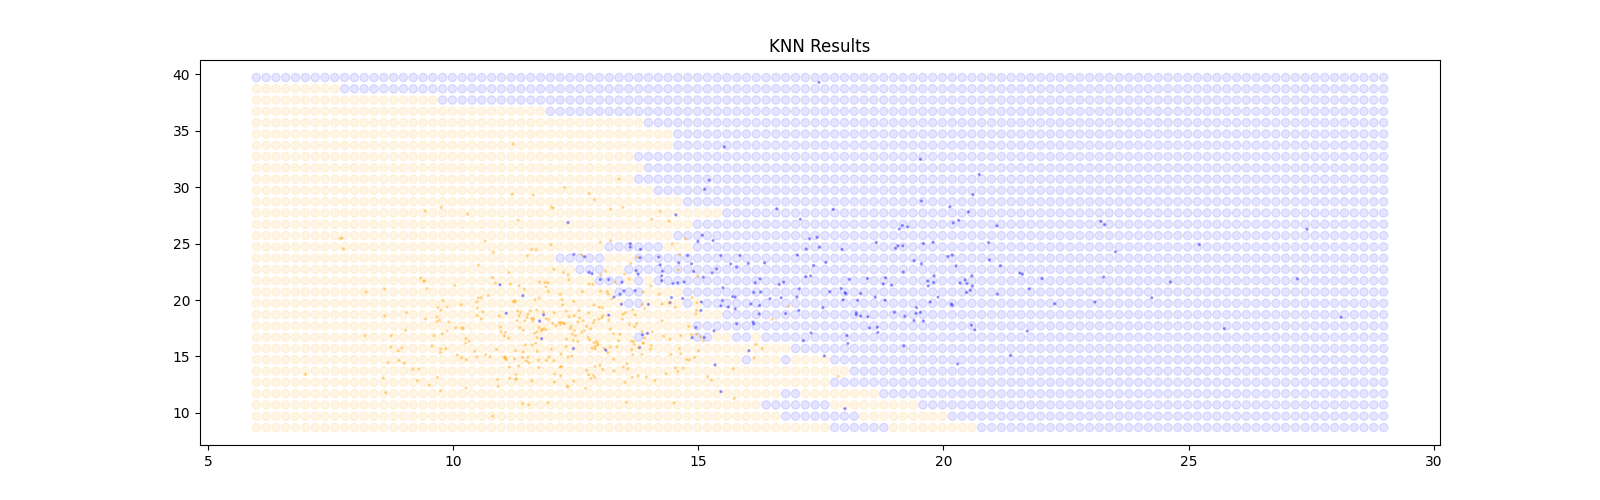

In [102]:
fig, ax = plt.subplots(figsize=(16,5))
ax.set_title('KNN Results')
ax.scatter(xx_, yy_, c=test_cols, alpha=0.1, edgecolors='face')
ax.scatter(f1, f2, c=colors, alpha=alpha, s=2)

In [116]:
xx_.shape, yy_.shape

((32, 116), (32, 116))

In [118]:
Z.shape

(32, 116)

In [134]:
test_cols_points = []
for i in colors:
    if i == 'blue':
        test_cols_points.append('yellow')
    else:
        test_cols_points.append('purple')

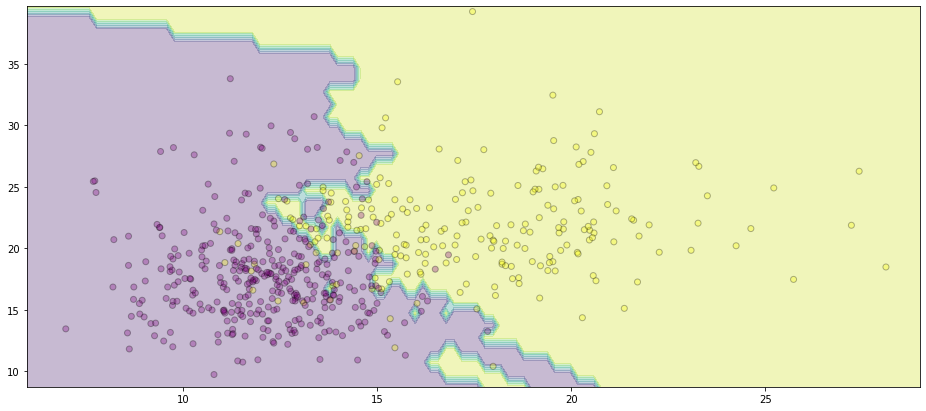

In [140]:
fig, ax = plt.subplots(figsize=(16,7))
ax.contourf(xx_,yy_,Z,alpha=alpha, cmap='viridis'),
ax.scatter(f1, f2, c=test_cols_points, edgecolors='k', alpha=alpha)
plt.show()